In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### We can import the data set. The dataframe name is now df
dftech = pd.read_csv('ret_porttech.csv',index_col=[0]) ### index_col=[0] removes default unnamed index column
dfecom = pd.read_csv('ret_portecom.csv',index_col=[0])
dffood = pd.read_csv('ret_portfood.csv',index_col=[0])

In [3]:
dfmerge = pd.merge(dftech,dfecom, on = ['day', 'month','year'])
dfmerge.columns=['BroadR','IntelR','MicroCR','MicronR','QualR','SamR','SKR','SMICR','day','month',
                 'year','AliR','AmazR','EbayR','RakR','SunR','WayR','ZalR','JDR'] ### Rename the columns
dfmerge = pd.merge(dfmerge,dffood, on = ['day', 'month','year'])

In [4]:
trainingset = dfmerge[(dfmerge['year']<2021)]
testset = dfmerge[(dfmerge['year']==2021)]
testset = testset.iloc[0:111,:] ### choose only the first half year of test set

In [5]:
### Now delete columns day, month, year; but before that keep day, month, year separately for later concatenation
dytrain=trainingset["day"]
mthtrain=trainingset["month"]
yrtrain=trainingset["year"]
del(trainingset['day'],trainingset['month'],trainingset['year'])
dytest=testset["day"]
mthtest=testset["month"]
yrtest=testset["year"]
del(testset['day'],testset['month'],testset['year'])

In [6]:
# Finding the simple correlation matrix from a series of returns
corr_matrix = trainingset.corr()
print(corr_matrix)

             BroadR    IntelR   MicroCR   MicronR     QualR      SamR  \
BroadR     1.000000  0.561325  0.677492  0.600893  0.577452  0.118570   
IntelR     0.561325  1.000000  0.648618  0.592514  0.524100  0.066441   
MicroCR    0.677492  0.648618  1.000000  0.698010  0.547158  0.148455   
MicronR    0.600893  0.592514  0.698010  1.000000  0.506498  0.183777   
QualR      0.577452  0.524100  0.547158  0.506498  1.000000  0.036172   
SamR       0.118570  0.066441  0.148455  0.183777  0.036172  1.000000   
SKR        0.154193  0.125854  0.193805  0.288913  0.078379  0.664308   
SMICR      0.129260  0.128111  0.153104  0.133455  0.112965  0.205982   
AliR       0.451022  0.422234  0.459626  0.464008  0.378726  0.102266   
AmazR      0.457432  0.461590  0.474770  0.459800  0.420567  0.043948   
EbayR      0.344139  0.337060  0.362459  0.348141  0.329855  0.129263   
RakR       0.204374  0.204482  0.214038  0.176992  0.159640  0.073963   
SunR       0.068138  0.126211  0.072906  0.060603  

In [7]:
### Create a principal component analysis (PCA) plot for the first two dimensions.
def getPCA(matrix):
    eVal,eVec=np.linalg.eigh(matrix) ### ..eigh(x) -- x is  real symmetric or complex Hermitian (conjugate symmetric) array. 
       ### Returns two objects, a 1-D array eVal =eigenvalues of matrix - eigenvalues with multiplicity, may not be ordered.
       ### and a 2-D square matrix, column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. 
    indices=eVal.argsort() ### Returns the indices that would sort an array. -1 refers to the last axis
    eVal,eVec=eVal[indices],eVec[:,indices]
    eVal=np.diagflat(eVal) ### Create a two-dimensional array with the flattened (changing to 1dim) input eVal as a diagonal.
    return eVal,eVec

In [8]:
eVal0,eVec0=getPCA(corr_matrix)

In [9]:
eigenvalues=np.diagonal(eVal0) ### creates a list of the diagonal elements in original
print(eigenvalues)

[0.23777545 0.24830976 0.29134883 0.30236206 0.35499693 0.36322877
 0.38419966 0.44332669 0.46659641 0.535817   0.55524774 0.61387326
 0.61922829 0.64157765 0.72200588 0.78494843 0.83230546 0.88442046
 0.97049917 1.18529588 1.317256   1.77494235 2.04324288 7.42719501]


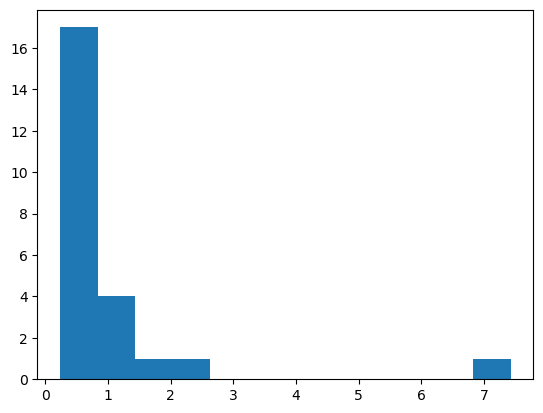

In [10]:
import matplotlib.pyplot as plt

plt.hist(eigenvalues, bins = 12)
plt.show()
### This is empirical pdf -- note this is just approx since N, T are not large -- it is approx to Marcenko-Pastur Theorem

In [11]:
from sklearn.neighbors import KernelDensity
def fitKDE(obs,bWidth=.25,kernel='gaussian',x=None):
    if len(obs.shape)==1: obs=obs.reshape(-1,1)
    kde=KernelDensity(kernel=kernel,bandwidth=bWidth).fit(obs)
    if x is None:x=np.unique(obs).reshape(-1,1)    
    if len(x.shape)==1: x=x.reshape(-1,1)
    logProb=kde.score_samples(x)
    pdf=pd.Series(np.exp(logProb),index=x.flatten())
    return pdf

C:\Users\kglim\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
pdf1=fitKDE(eigenvalues,bWidth=.08) ### bandwidth is increased to smoothen the pdf curve

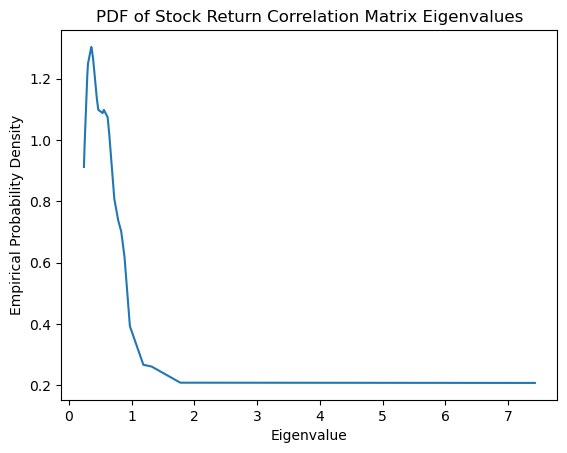

In [13]:
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.lineplot(x=eigenvalues, y=pdf1, ax=ax) ### prints empirical pdf
ax.set_title('PDF of Stock Return Correlation Matrix Eigenvalues')
ax.set_xlabel('Eigenvalue')
ax.set_ylabel('Empirical Probability Density')
plt.show()

In [14]:
print(eigenvalues) 
### single array, print(eigenvalue.shape) gives (24,). It is in increasing order
### eigenvalues[20:] gives eigenvalues above list order 20. eigenvalues[:20] gives eigenvalues up to list order 20

[0.23777545 0.24830976 0.29134883 0.30236206 0.35499693 0.36322877
 0.38419966 0.44332669 0.46659641 0.535817   0.55524774 0.61387326
 0.61922829 0.64157765 0.72200588 0.78494843 0.83230546 0.88442046
 0.97049917 1.18529588 1.317256   1.77494235 2.04324288 7.42719501]


In [15]:
### The 21st to 24th elements on the eigenvalue list are above 1.3
### The constant residual eigenvalue method is applied to average as constant all eigenvalues below 1.3 
### -- or even nullify as they could be just from noises

small=20 ### eigenvalues elements up to order 20 are all below 1.3
neweig=eigenvalues.copy()   ### rather similar without .copy()
neweig[:small]=eigenvalues[:small].sum()/small
eigenvalues1=np.diagflat(neweig) ### this is diag 24x24 matrix with same constant in first 20 diagonals
corr1=np.dot(eVec0,eigenvalues1).dot(eVec0.T) ### eVec.T is transpose of eVec
dd=np.diag(corr1) ## after constant residual eigenvalue adjustment, corr1 is not necessarily a corr matrix
                  ## need to readjust its diag to ones
corr2=corr1/dd ### divides ith column of corr1 by ith element in list dd, same effect as corr1 .dot(np.diagflat(1/dd))

In [16]:
### Now we use corr2 as denoised correlation matrix of the 24 stock returns

In [17]:
print(corr2.shape)
print(corr2)

(24, 24)
[[ 1.          0.49857953  0.49873607  0.48473558  0.49346076  0.1226159
   0.16073357  0.15311462  0.41277452  0.44554364  0.43965816  0.25836237
   0.05458851  0.40273512  0.24756209  0.42405994  0.37527365  0.40598745
   0.36580369  0.41896036  0.13864184  0.36466083  0.22551009  0.39763673]
 [ 0.48091999  1.          0.47856167  0.46416978  0.4786616   0.0905861
   0.12688135  0.14124619  0.4094537   0.44224509  0.42925704  0.25285617
   0.05214942  0.39480969  0.24171396  0.42129248  0.35269875  0.38500814
   0.34443837  0.39467797  0.1296579   0.33663365  0.20717963  0.37032777]
 [ 0.52468335  0.52194654  1.          0.51547899  0.51543065  0.15396652
   0.19350973  0.17773176  0.4370898   0.46522481  0.45948985  0.26372797
   0.07301545  0.42476994  0.25929964  0.44717495  0.38056126  0.411859
   0.3703345   0.428414    0.15971507  0.37418381  0.22262427  0.41085235]
 [ 0.49219022  0.48861474  0.4975223   1.          0.48076811  0.18638751
   0.22605923  0.1780527   0.4

In [18]:
### corr2 is transformed back to corresponding covariance matrix using original variances
var = trainingset.var()
sd = np.sqrt(var)  ### here output comes from pandas -- dataframe, so some numpy commands may not work as they are not arrays
                   ### such as np.diagflat()
print(sd)

BroadR       0.024089
IntelR       0.023111
MicroCR      0.026355
MicronR      0.030768
QualR        0.025415
SamR         0.017472
SKR          0.023599
SMICR        0.035990
AliR         0.022421
AmazR        0.020011
EbayR        0.018804
RakR         0.021795
SunR         0.020323
WayR         0.048417
ZalR         0.025410
JDR          0.026660
TysonR       0.021226
PepsicoR     0.014445
NestleR      0.011154
MondelezR    0.014640
KweichowR    0.019680
DiageoR      0.014818
DanoneR      0.013318
AnheuserR    0.020728
dtype: float64


In [19]:
sd1=sd.to_numpy()  ### now sd1 is array

In [20]:
sd2=np.diagflat(sd1) ### sd2 is 24 x 24 diagonal matrix with diagonal as std devs

In [21]:
cov2=(sd2 .dot(corr2)) .dot (sd2.T)
print(cov2.shape)
print(cov2)

(24, 24)
[[ 5.80287843e-04  2.77572553e-04  3.16631186e-04  3.59278326e-04
   3.02111098e-04  5.16086805e-05  9.13727412e-05  1.32744116e-04
   2.22936264e-04  2.14775034e-04  1.99151417e-04  1.35645417e-04
   2.67243808e-05  4.69716335e-04  1.51534375e-04  2.72340658e-04
   1.91885616e-04  1.41265867e-04  9.82899325e-05  1.47752301e-04
   6.57260782e-05  1.30170719e-04  7.23460023e-05  1.98547614e-04]
 [ 2.67741014e-04  5.34122258e-04  2.91487153e-04  3.30066606e-04
   2.81152041e-04  3.65793629e-05  6.92000545e-05  1.17482715e-04
   2.12163777e-04  2.04529129e-04  1.86545291e-04  1.27364391e-04
   2.44937026e-05  4.41776459e-04  1.41947368e-04  2.59577798e-04
   1.73020222e-04  1.28526635e-04  8.87914364e-05  1.33537364e-04
   5.89713360e-05  1.15286994e-04  6.37667418e-05  1.77403858e-04]
 [ 3.33104262e-04  3.17912449e-04  6.94580112e-04  4.18000233e-04
   3.45242083e-04  7.08992579e-05  1.20351722e-04  1.68578856e-04
   2.58272368e-04  2.45355530e-04  2.27710793e-04  1.51485653e-04

In [22]:
### cov2 (24 x 24) is saved as 
cov2=pd.DataFrame(cov2) ### cannot directly use pandas save -- need to convert np arrays back to pandas format
import pandas as pd
cov2.to_csv('denoised_cov.csv')